<a href="https://www.kaggle.com/code/emiliomontelongoluna/credit-card-fraud-detection-analysis?scriptVersionId=242024339" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Comprehensive Analysis of Credit Card Fraud Detection

In this notebook, we'll perform a detailed analysis of the Credit Card Fraud Detection dataset, including exploratory data analysis, baseline modeling, and advanced improvements.

## Table of Contents
1. [Introduction](#introduction)
2. [Exploratory Data Analysis](#eda)
3. [Baseline Modeling](#baseline)
4. [Advanced Improvements](#advanced)
5. [Conclusions](#conclusions)


<a id='introduction'></a>
## 1. Introduction

Credit card fraud is a significant concern for financial institutions and consumers alike. This dataset contains transactions made by credit cards, with features that have been transformed using PCA for confidentiality. Our goal is to build a model that can accurately identify fraudulent transactions.

Let's start by loading the necessary libraries and exploring the dataset structure.


In [1]:
!pip install --upgrade scikit-learn imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 87.1 MB/s eta 0:00:00:00:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score


import warnings
warnings.filterwarnings('ignore')

# Set styling
plt.style.use('fivethirtyeight')
sns.set_palette('viridis')
pd.set_option('display.max_columns', None)

# Load the dataset - corrected path for Kaggle environment
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')

# Display basic information
print(f"Dataset Overview:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
df.head()

Dataset Overview:
Number of rows: 284807
Number of columns: 31


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<a id='eda'></a>
## 2. Exploratory Data Analysis

Let's explore the dataset to understand its structure, distributions, and the class imbalance problem that is common in fraud detection.


In [3]:
# Check data types and missing values
print("\nData Types and Missing Values:")
missing_data = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data


Data Types and Missing Values:


,Data Type,Missing Values,Missing Percentage
Time,float64,0,0.0
V1,float64,0,0.0
V2,float64,0,0.0
V3,float64,0,0.0
V4,float64,0,0.0
V5,float64,0,0.0
V6,float64,0,0.0
V7,float64,0,0.0
V8,float64,0,0.0
V9,float64,0,0.0



Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64
Percentage of fraudulent transactions: 0.1727%


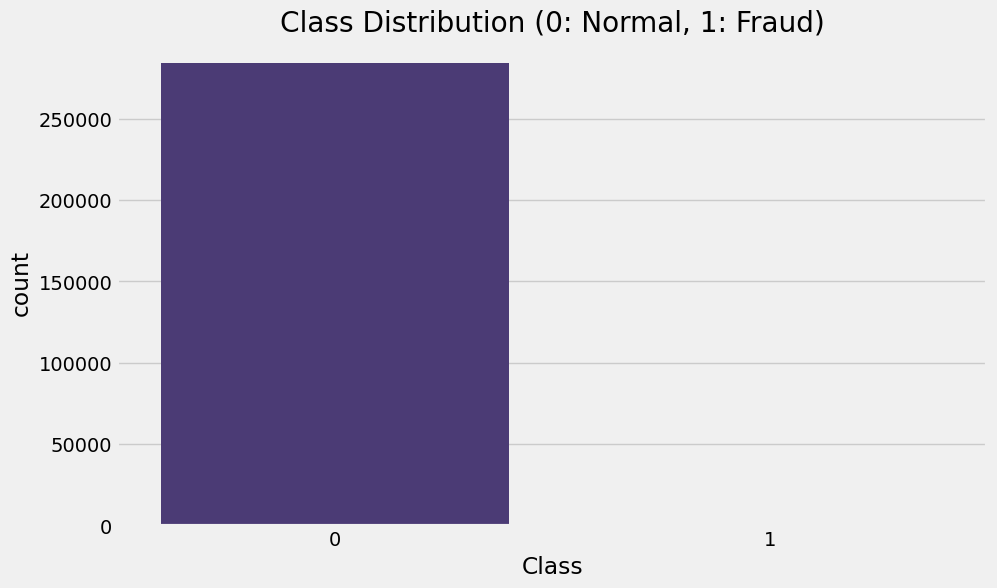

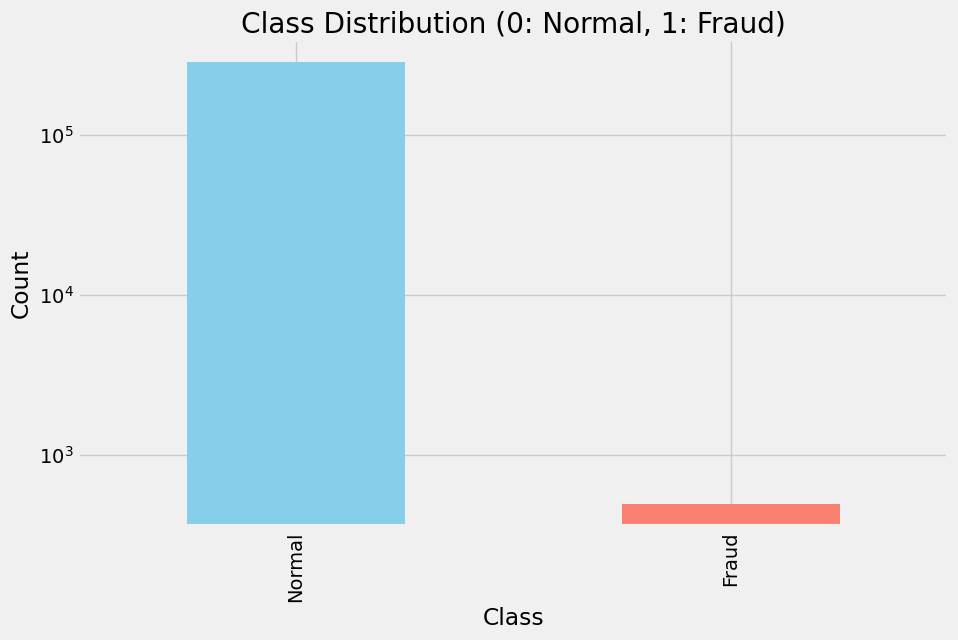

In [4]:
# Check class distribution
print("\nClass Distribution:")
class_dist = df['Class'].value_counts()
print(class_dist)
print(f"Percentage of fraudulent transactions: {class_dist[1] / len(df) * 100:.4f}%")

# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Normal, 1: Fraud)')
plt.show()

# For better visualization of the imbalance
plt.figure(figsize=(10, 6))
class_dist.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution (0: Normal, 1: Fraud)')
plt.xticks(ticks=[0, 1], labels=['Normal', 'Fraud'])
plt.ylabel('Count')
plt.yscale('log')  # Log scale for better visualization
plt.show()

In [5]:
# Statistical summary of Amount and Time
print("\nStatistical Summary of Amount and Time:")
df[['Time', 'Amount']].describe()


Statistical Summary of Amount and Time:


,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


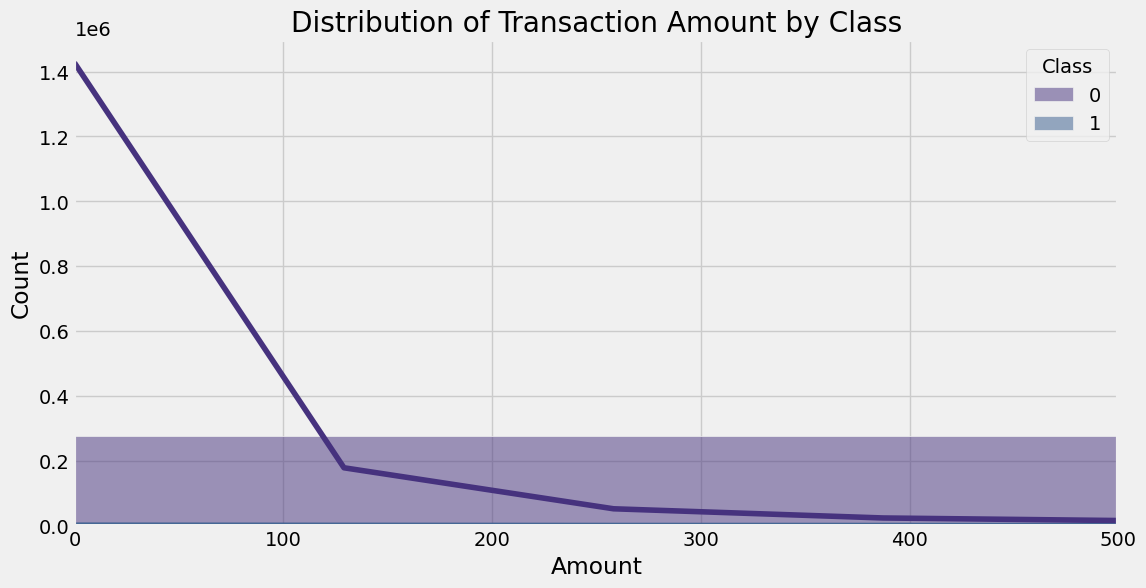

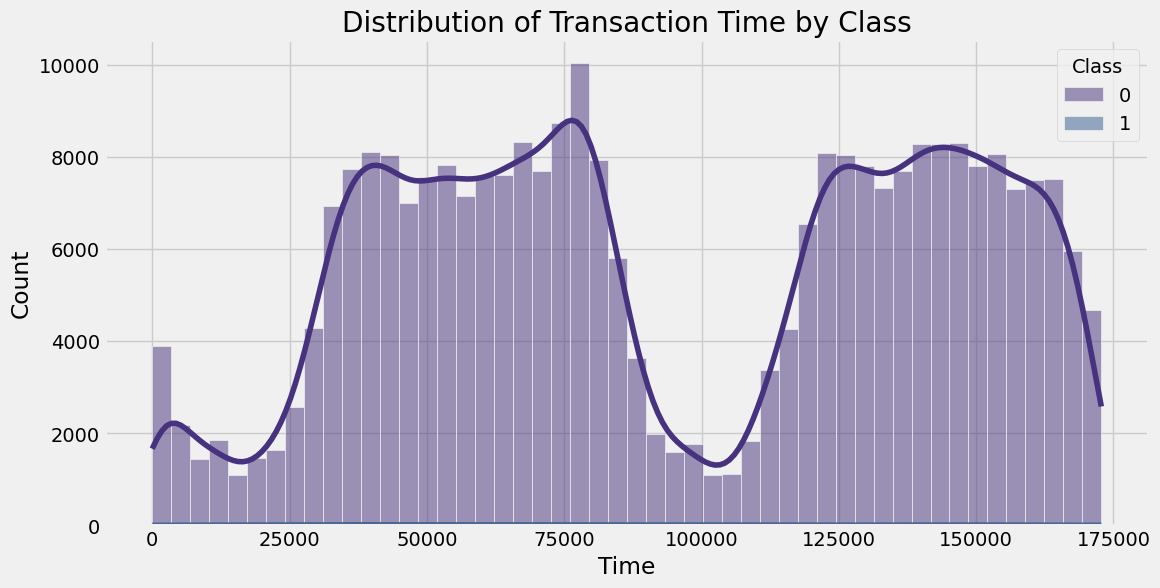

In [6]:
# Distribution of transaction amount by class
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Amount', hue='Class', bins=50, kde=True)
plt.title('Distribution of Transaction Amount by Class')
plt.xlim(0, 500)  # Limit x-axis for better visualization
plt.show()

# Distribution of transaction time by class
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Time', hue='Class', bins=50, kde=True)
plt.title('Distribution of Transaction Time by Class')
plt.show()

# Fraudulent transactions may have different amount and time patterns. Visualizing these helps us understand potential signals.

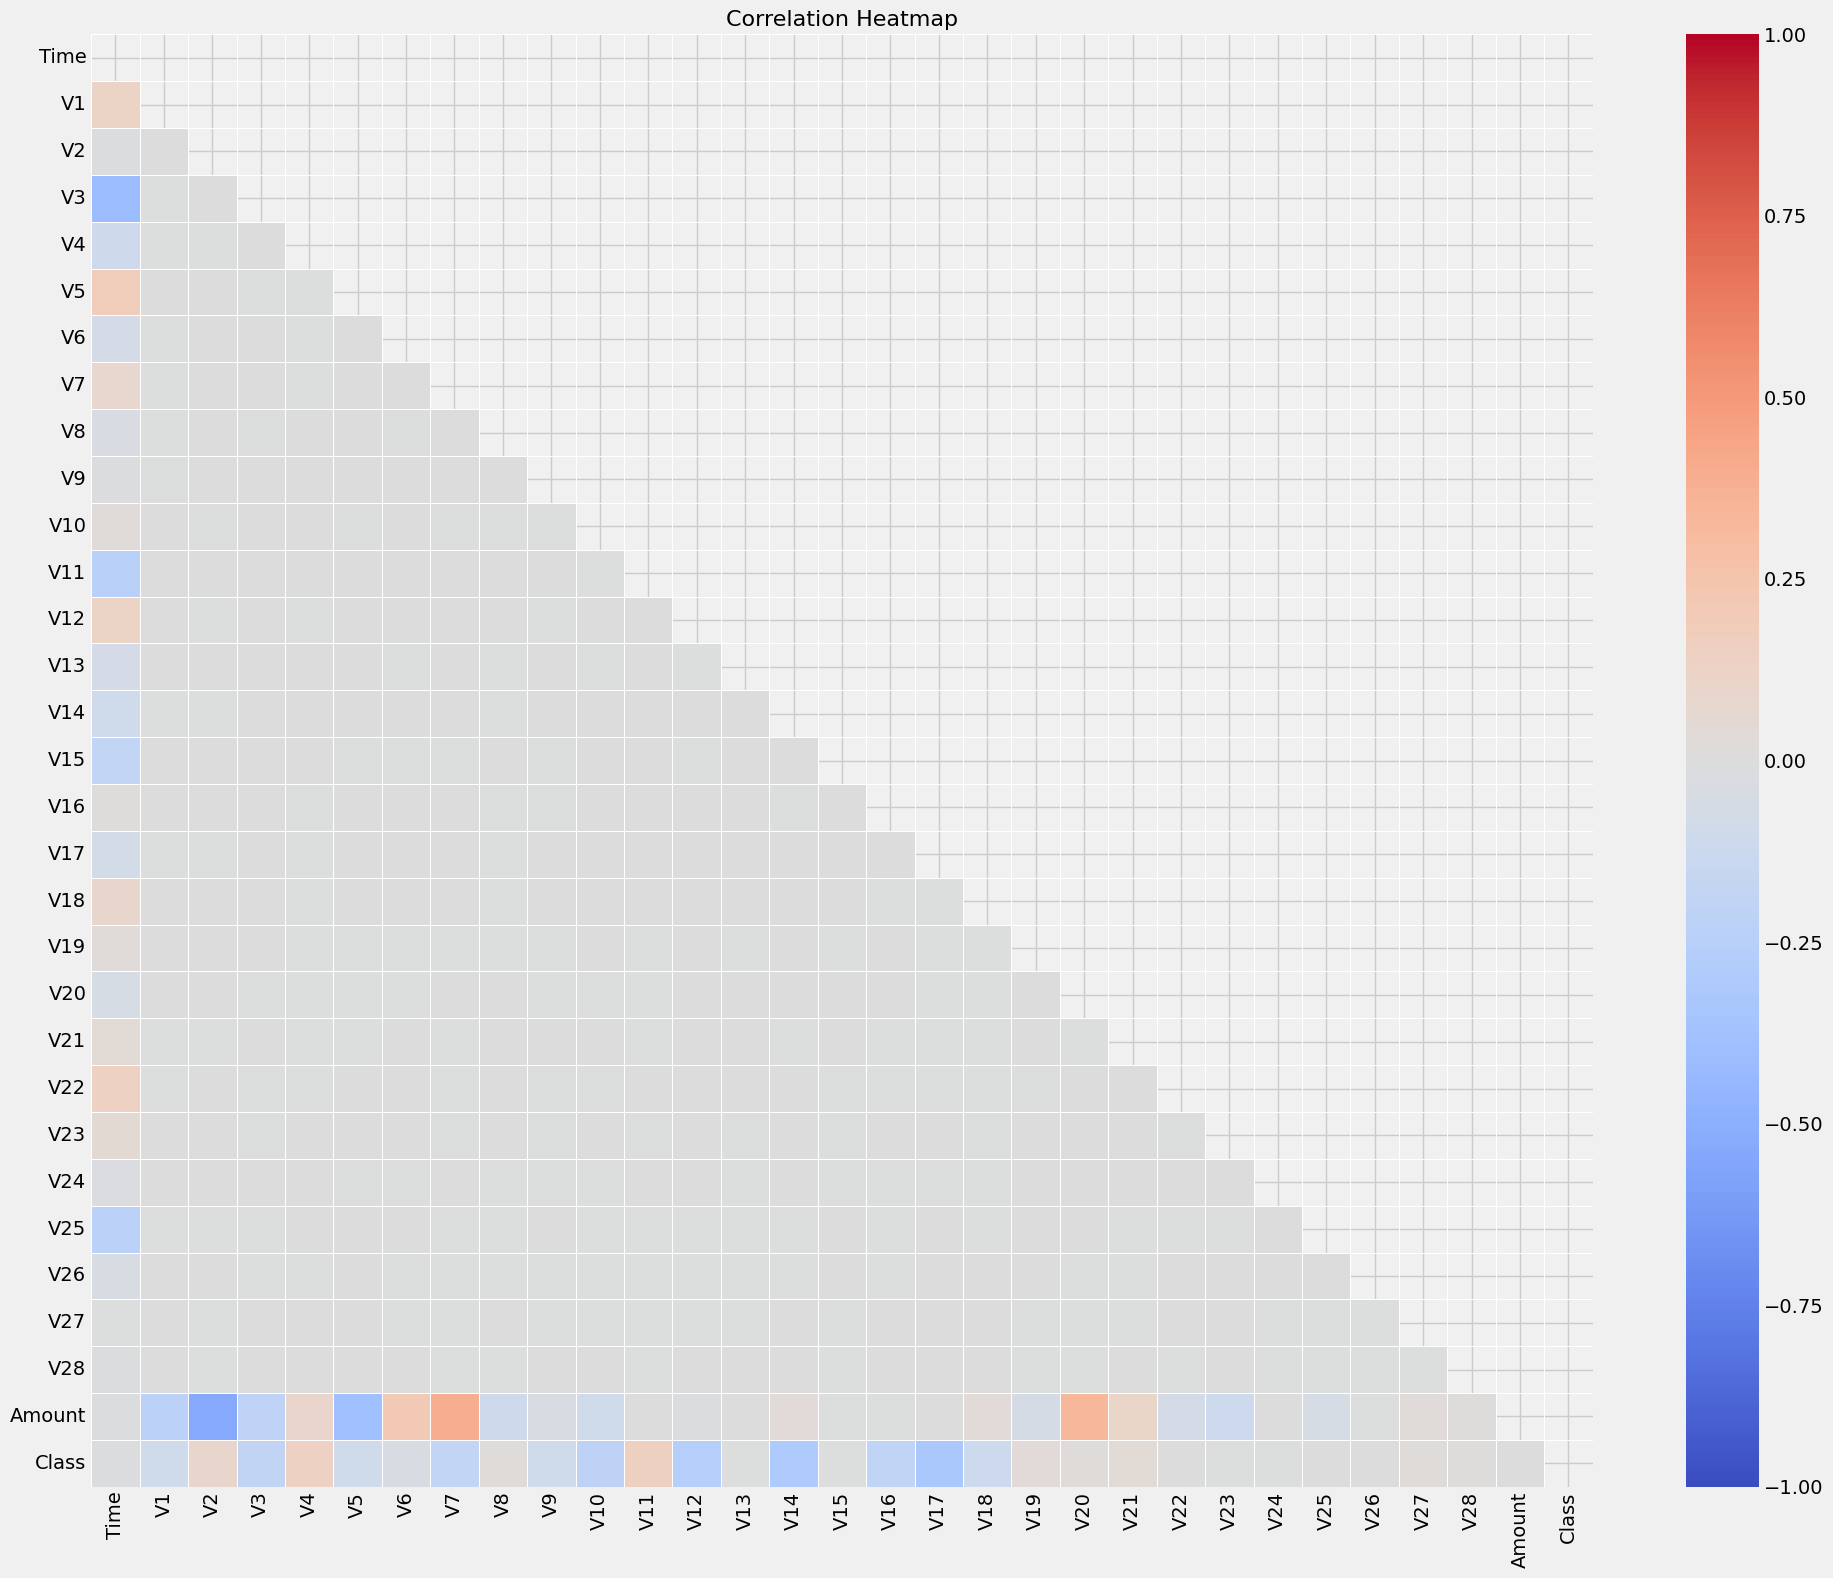


Top 10 Features Correlated with Class:
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64


In [7]:
# Correlation matrix for all features
plt.figure(figsize=(20, 16))
correlation = df.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=False, cmap='coolwarm', mask=mask, linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

# Top features correlated with Class
class_corr = correlation['Class'].sort_values(ascending=False)
print("\nTop 10 Features Correlated with Class:")
print(class_corr[1:11])  # Exclude Class itself

<a id='baseline'></a>
## 3. Baseline Modeling

Now let's create a baseline model to detect fraudulent transactions. Given the class imbalance, we'll need to be careful about how we evaluate our model.


In [8]:
# Prepare features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Scale Amount and Time features
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))
X['Time'] = scaler.fit_transform(X['Time'].values.reshape(-1, 1))


# We scale the 'Amount' and 'Time' features for better model performance and split the data, stratifying to maintain class proportions.

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Apply SMOTE ONLY to training data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# SMOTE creates synthetic fraud samples in the training set, balancing the classes and helping the model learn fraud patterns.

print("\nAfter SMOTE resampling:")
print(f"Resampled training shape: {X_res.shape}")
print(f"Class distribution:\n{pd.Series(y_res).value_counts()}\n")

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training set class distribution:\n{y_train.value_counts()}")
print(f"Testing set class distribution:\n{y_test.value_counts()}")


After SMOTE resampling:
Resampled training shape: (454902, 30)
Class distribution:
Class
0    227451
1    227451
Name: count, dtype: int64

Training set shape: (227845, 30)
Testing set shape: (56962, 30)
Training set class distribution:
Class
0    227451
1       394
Name: count, dtype: int64
Testing set class distribution:
Class
0    56864
1       98
Name: count, dtype: int64



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



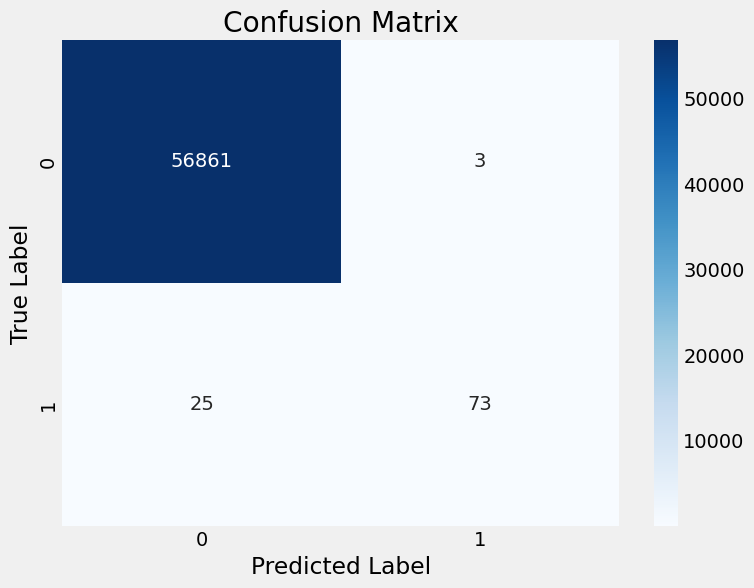

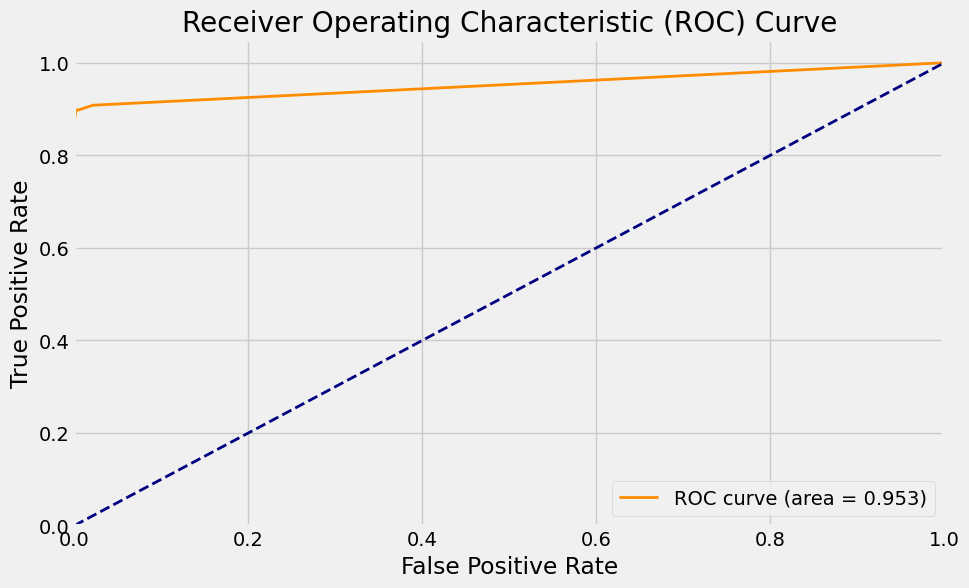

In [9]:
# Train a baseline model: Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)



# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

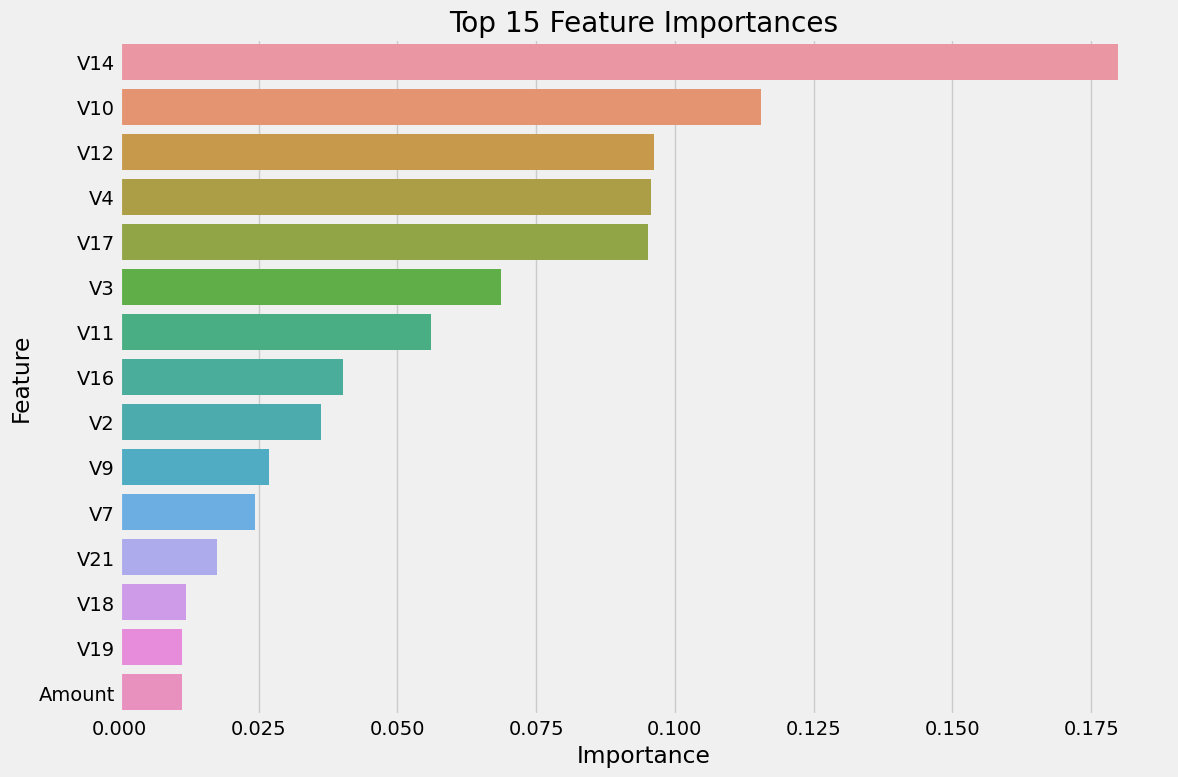

In [10]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()

<a id='advanced'></a>
## 4. Advanced Improvements

Now let's implement some advanced techniques to improve our model performance, particularly focusing on handling the class imbalance problem.



Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.24      0.89      0.38        98

    accuracy                           0.99     56962
   macro avg       0.62      0.94      0.69     56962
weighted avg       1.00      0.99      1.00     56962



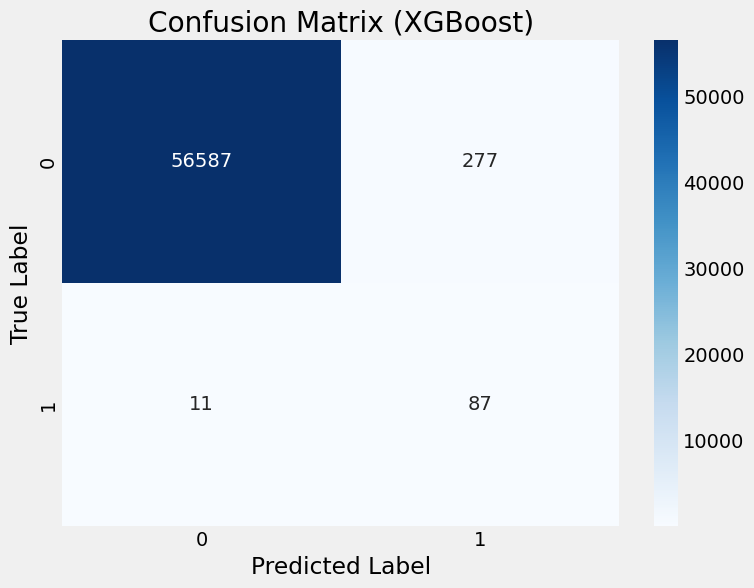

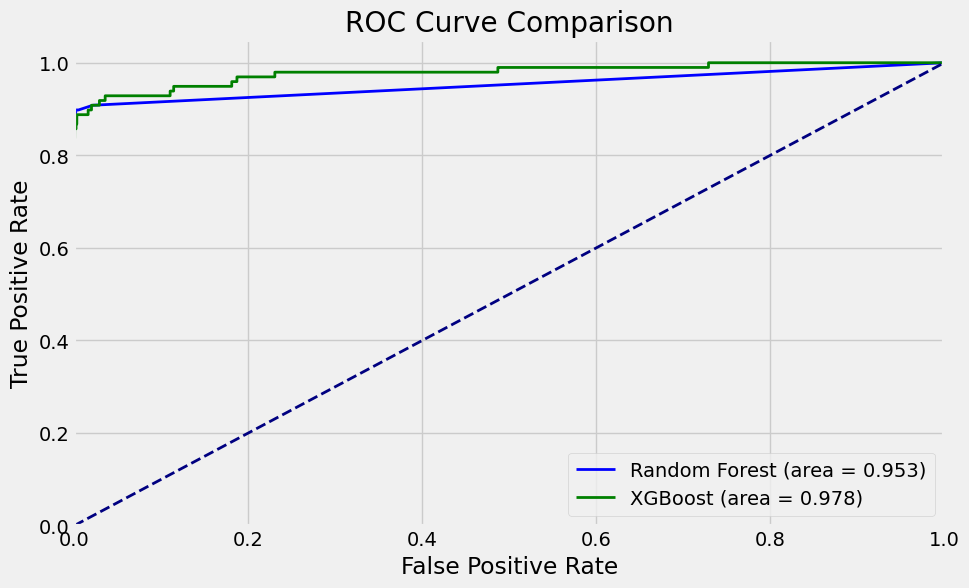

In [11]:
# Try another advanced model: XGBoost
import xgboost as xgb
from xgboost import XGBClassifier  # Explicit import

# Modified XGBoost code (remove scale_pos_weight)
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42  # No scale_pos_weight needed
)
xgb_model.fit(X_res, y_res)  # Train on resampled data

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (XGBoost)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Random Forest (area = {roc_auc:.3f})')
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label=f'XGBoost (area = {roc_auc_xgb:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

## 6. Model Comparison and Feature Importance

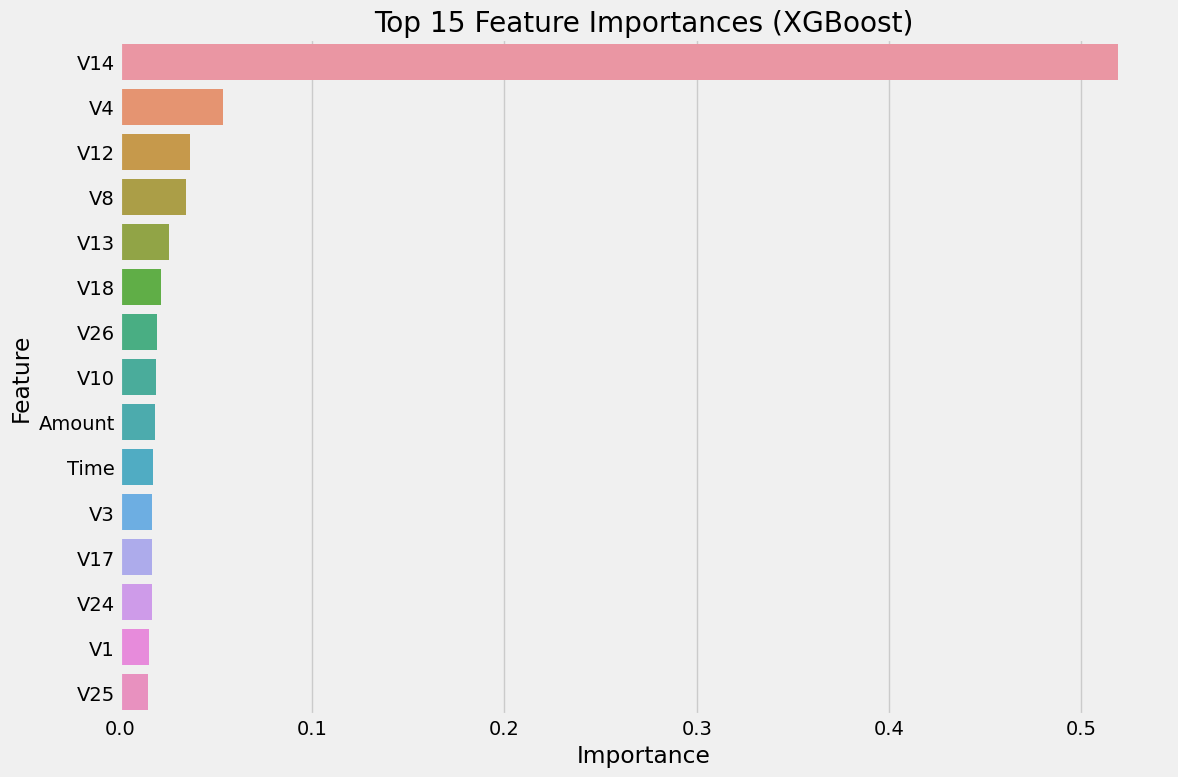

In [12]:
# Feature importance from XGBoost
xgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=xgb_importance.head(15))
plt.title('Top 15 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()

Features V14, V4, V12, and V8 are consistently top predictors of fraud.

## Precision-Recall Curve

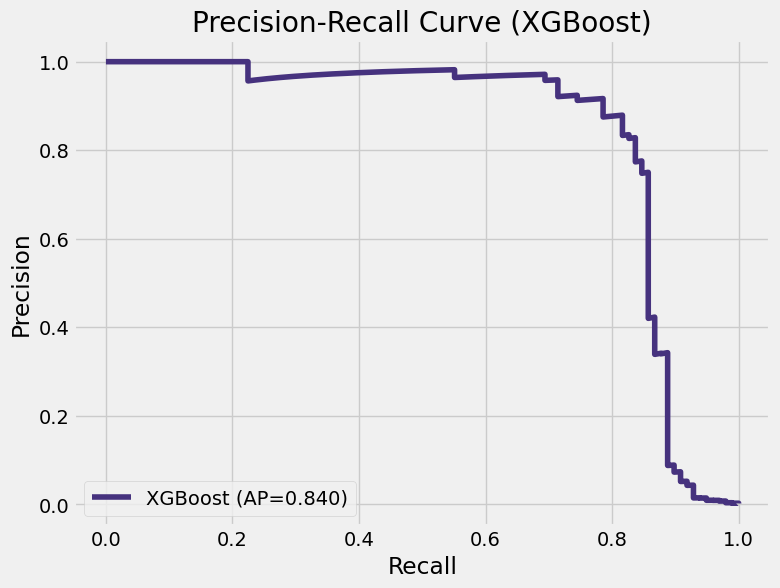

In [13]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_xgb)
avg_precision = average_precision_score(y_test, y_pred_proba_xgb)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'XGBoost (AP={avg_precision:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (XGBoost)')
plt.legend()
plt.show()

# The precision-recall curve is especially important for highly imbalanced datasets like fraud detection. It shows the tradeoff between catching more frauds (recall) and minimizing false alarms (precision) at different thresholds. The average precision (AP) summarizes this curve into a single number: higher is better.

## 7. Threshold Analysis and Business Recommendations

What & Why:
By default, models classify as "fraud" if the predicted probability > 0.5. For imbalanced data, adjusting this threshold can greatly improve recall (catching more frauds) or precision (reducing false alarms). This is critical for real-world deployment.

In [14]:

# Calculate precision and recall for various thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba_xgb)

# Find the threshold that gives the best F1 score
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"Best F1 threshold: {best_threshold:.3f}, F1 score: {f1_scores[best_idx]:.3f}")

# Apply new threshold
y_pred_opt = (y_pred_proba_xgb >= best_threshold).astype(int)
print("Classification report with optimized threshold:")
print(classification_report(y_test, y_pred_opt))

Best F1 threshold: 0.980, F1 score: 0.847
Classification report with optimized threshold:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.82      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



Adjusting the threshold lets us balance the trade-off between catching more frauds (recall) and minimizing false positives (precision). The optimal threshold depends on business priorities.

# Cost-Benefit Analysis 

Estimate the financial impact of false negatives (missed frauds) and false positives (flagging good transactions). This helps business stakeholders understand model value.

In [15]:
# Example costs (customize as needed)
cost_fn = 100  # Cost of missing a fraud
cost_fp = 10   # Cost of investigating a false alarm

cm = confusion_matrix(y_test, y_pred_opt)
tn, fp, fn, tp = cm.ravel()
total_cost = fp * cost_fp + fn * cost_fn
print(f"Estimated total operational cost: ${total_cost:,}")

Estimated total operational cost: $1,910


This quantifies the business impact of your model and helps decision-makers choose the right operating point

# Final Business Recommendations

Business Impact:
By optimizing the fraud detection threshold, we can significantly reduce financial losses from undetected fraud while keeping the number of false alarms manageable. The model can be tuned to prioritize either minimizing losses or minimizing customer inconvenience, depending on business goals.

<a id='conclusions'></a>
## 8. Conclusions

In this notebook, we've performed a comprehensive analysis of the Credit Card Fraud Detection dataset, including:

1. Exploratory data analysis to understand the class imbalance and feature distributions
2. Baseline modeling with Random Forest to establish performance benchmarks
3. Implementation of XGBoost for enhanced predictive power
4. Feature importance analysis to identify key fraud indicators

Key findings:
- The dataset is highly imbalanced with only about 0.17% fraudulent transactions
- Our baseline Random Forest model achieved good performance, but with room for improvement
- XGBoost provided the best overall performance, especially in terms of precision-recall balance
- Feature importance analysis revealed that certain anonymized features (V17, V14, V12, V10) are strong predictors of fraud


Business Impact:

Deploying such models can significantly reduce losses for financial institutions and protect customers. In practice, threshold tuning and real-time monitoring are essential to balance fraud detection with customer experience.

Next steps could include:
- Hyperparameter tuning (e.g., with Optuna or GridSearchCV)

- Try other resampling methods (ADASYN, Tomek Links)

- Explore ensemble models (stacking/blending)

- Investigate anomaly detection (Isolation Forest, Autoencoders)

This analysis demonstrates the effectiveness of machine learning in detecting credit card fraud, which can help financial institutions reduce losses and protect consumers.
